<a href="https://colab.research.google.com/github/iffigueroa/Satellite-Classification/blob/main/satellite_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Satellite Purpose Classification

## Overview

TODO: Give explanation of problem/classification efforts


## About the dataset

The dataset I'll be using for this project was compiled by the Union of Concerned Scientists (UCS) from several sources. The dataset contains information about various satellites that are currently or have been in orbit.

The dataset is available here: https://www.ucsusa.org/resources/satellite-database

# Part One: Data Cleaning & Exploratory Data Analysis (EDA)

TODO: Give overview of the purpose of this section


## Loading the Data



In [1]:
import pandas as pd

sat_df = pd.read_excel('UCS-Satellite-Database-Officialname.xlsx')
sat_df.head()

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAC AIS-Sat1 (Kelpie 1),United Kingdom,United Kingdom,AAC Clyde Space,Commercial,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
print(f"This dataset has {sat_df.shape[0]} entries and {sat_df.shape[1]} attributes.")
print(f"Available Attributes:\n\n{sat_df.dtypes}")

This dataset has 7560 entries and 67 attributes.
Available Attributes:

Current Official Name of Satellite    object
Country/Org of UN Registry            object
Country of Operator/Owner             object
Operator/Owner                        object
Users                                 object
                                       ...  
Unnamed: 62                           object
Unnamed: 63                           object
Unnamed: 64                           object
Unnamed: 65                           object
Unnamed: 66                           object
Length: 67, dtype: object


## Defining Some Helper Functions

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Helpers
def plot_top_n_histogram(df, column_name, n=5):
    # Get the unique values and their counts
    value_counts = df[column_name].value_counts()

    # If there are more than n unique values, take the top n
    if len(value_counts) > n:
        value_counts = value_counts.head(n)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.title(f'Top {n} values in {column_name}')
    plt.xticks(rotation=90)

    # # Add text annotation for each bar
    # for i, v in enumerate(value_counts):
    #     plt.text(i, v + 0.005, str(v), ha='center', va='bottom')

    plt.show()

def plot_dates(df: pd.DataFrame, column: str,):
  launches_per_year = df.groupby(df[column].dt.year).size()
  launches_per_year.plot(kind='bar', xlabel='Year', ylabel='Number of Launches', title='Launches by Year')
  plt.show()

def column_overview(df: pd.DataFrame, column: str, show_plot: bool = False, n:int = 50) -> None:
    print(f"Column: {column}")
    print(f"Type: {df[column].dtype}")
    unique_values = df[column].unique()
    print(f"Found {len(unique_values)} unique values")
    if show_plot:
        if df[column].dtype == 'datetime64[ns]':
          plot_dates(df, column)
        else:
          plot_top_n_histogram(df, column, n=n)
    else:
      try:
        unique_values = sorted(df[column].unique().tolist())
        print(unique_values)
      except Exception:
        print(unique_values)


## Initial Data Cleaning

TODO: Add Data Cleaning Summary
- remove unnecessary columns
- Check for + handle null values



### Removing Unnecessary Attributes

With the data loaded we can see that we have quite a lot to work with - which is good and bad. We have over 7500 entries, which will be good when we get to building our classifier. However, we also have 67 attributes to work with, so before we get into any major analysis or model building we'll want to remove attributes from our dataset that are not going to provide value in building our model.

To start, we can take a look and see if there are any attributes that don't contextually make sense to inclde as a part of our classifier.

- There are several `Source` and `Unnamed` columns in the dataset these are mostly NaN, comments or hyperlinks provided for reference.
- `Comments` is mostly NaN with occasional comments about the sattelite
- `Current Official Name of Satellite`, `NORAD Number`, and `COSPAR Number` are all identifiers that will not be needed


We can start by dropping these values.

In [4]:
# Dropping unnecessary columns:
unnamed_columns = [col for col in sat_df.columns if 'Unnamed' in col]
source_columns = [col for col in sat_df.columns if 'Source' in col]

columns_to_drop =  unnamed_columns + source_columns + ['Current Official Name of Satellite', 'NORAD Number', 'COSPAR Number', 'Comments']
sat_df = sat_df.drop(columns=columns_to_drop)
print(sat_df.dtypes)

Country/Org of UN Registry     object
Country of Operator/Owner      object
Operator/Owner                 object
Users                          object
Purpose                        object
Detailed Purpose               object
Class of Orbit                 object
Type of Orbit                  object
Longitude of GEO (degrees)    float64
Perigee (km)                  float64
Apogee (km)                   float64
Eccentricity                  float64
Inclination (degrees)         float64
Period (minutes)              float64
Launch Mass (kg.)             float64
Dry Mass (kg.)                 object
Power (watts)                  object
Date of Launch                 object
Expected Lifetime (yrs.)      float64
Contractor                     object
Country of Contractor          object
Launch Site                    object
Launch Vehicle                 object
dtype: object


In [5]:
print(sat_df.dtypes)

Country/Org of UN Registry     object
Country of Operator/Owner      object
Operator/Owner                 object
Users                          object
Purpose                        object
Detailed Purpose               object
Class of Orbit                 object
Type of Orbit                  object
Longitude of GEO (degrees)    float64
Perigee (km)                  float64
Apogee (km)                   float64
Eccentricity                  float64
Inclination (degrees)         float64
Period (minutes)              float64
Launch Mass (kg.)             float64
Dry Mass (kg.)                 object
Power (watts)                  object
Date of Launch                 object
Expected Lifetime (yrs.)      float64
Contractor                     object
Country of Contractor          object
Launch Site                    object
Launch Vehicle                 object
dtype: object


Next, I noticed that a few attributes have related/dependent attributes. For example we have:
- `Contractor` and `Country of Contractor`
- `Operator/Owner` and `Country of Operator/Owner`

When we begin building the model, we really want to avoid introducing dependent variables and instead pick variables that can independently represent the feature. In this case, we can take a look at each feature's data using the code below.


Column: Operator/Owner
Type: object
Found 668 unique values


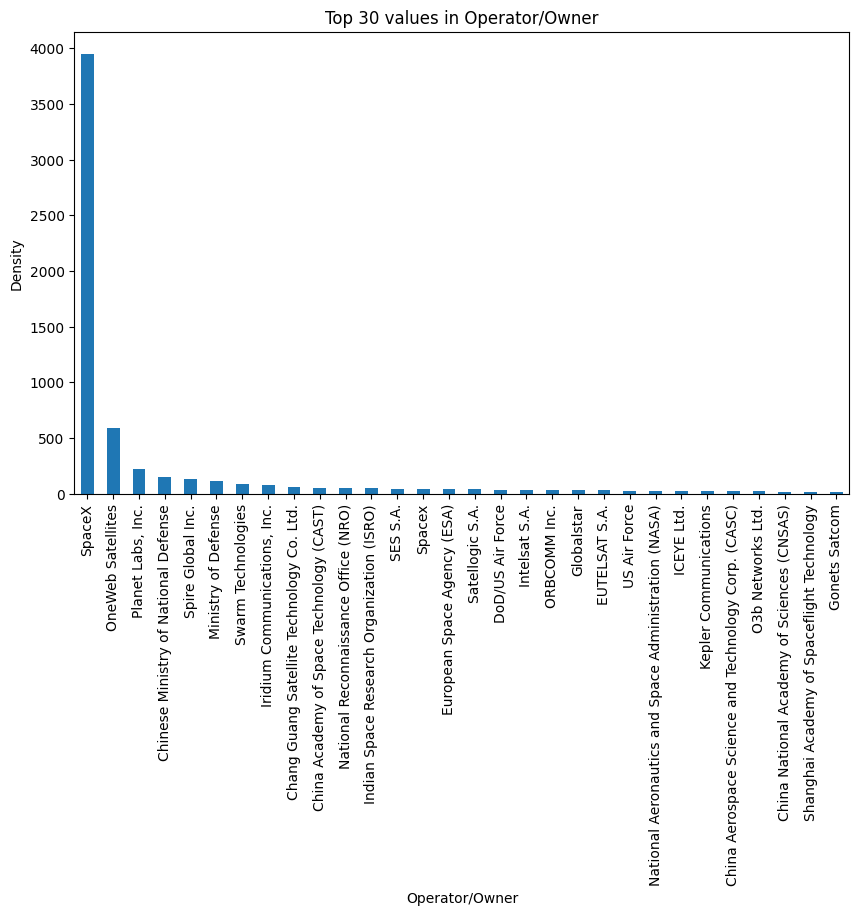

In [6]:
column_overview(sat_df, 'Operator/Owner', show_plot=True, n=30)

Column: Contractor
Type: object
Found 577 unique values


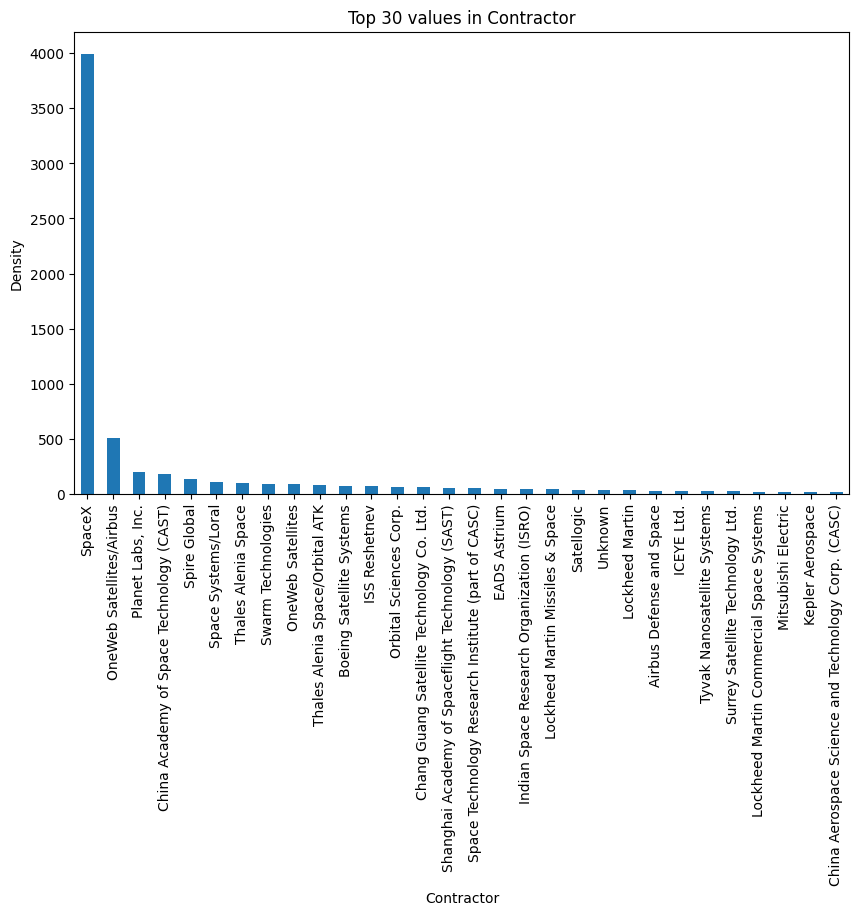

In [7]:
column_overview(sat_df, 'Contractor', show_plot=True, n=30)

What we end up seeing is that the `Contractor` and `Operator/Owner` attributes have over 500 unique attributes each. We can see that there are several values that have variations in spelling/formatting that would make cleaning these attributes a heavy lift with this many values (For example you can see that for `Operator/Owner` SpaceX is listed as both SpaceX and Spacex). We could certainly take time to clean these values, however we have another attribute for each that may make more sense to work with, the country.

Column: Country of Operator/Owner
Type: object
Found 105 unique values


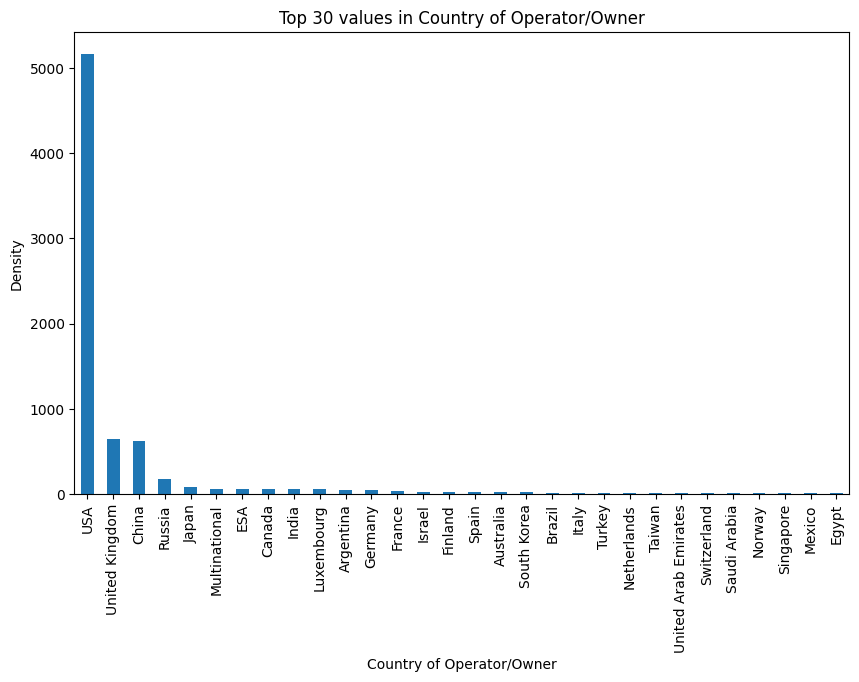

In [8]:
column_overview(sat_df, 'Country of Operator/Owner', show_plot=True, n=30)

Column: Country of Contractor
Type: object
Found 100 unique values


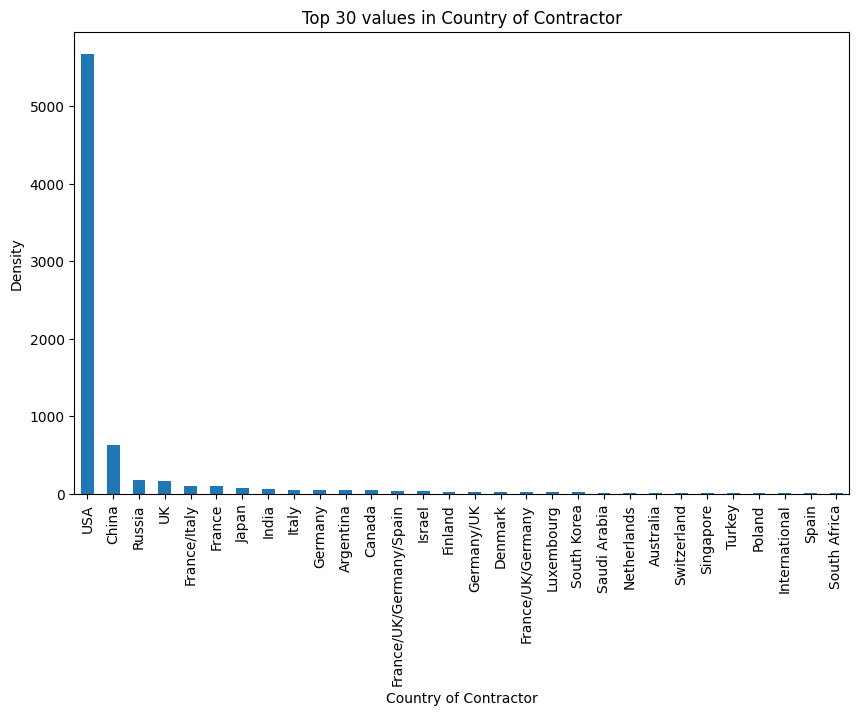

In [9]:
column_overview(sat_df, 'Country of Contractor', show_plot=True, n=30)

As we can see these attributes have fewer values, are more standardized, and have fewer duplicates to work with. For this reason we can drop the `Operator/Owner` and `Contractor` columns.

It's also possible we won't need both of these attributes later on either, but we'll address that during feature selection.

In [10]:
sat_df = sat_df.drop(columns=['Operator/Owner', 'Contractor'])

### Converting Column Types

Most of our attributes are correctly typed, however the `Date of Launch` is still listed as a plain object. Using the code below we can update that to a datetype object.

In [11]:
"""
Create temp column called date_tmp and convert the values to datetimes
if we use errors='coerce' any vlaues that can't be converted are marked NaT
"""
sat_df['date_tmp'] = pd.to_datetime(sat_df['Date of Launch'], errors='coerce')

# Check how many NaT values we have
na_values = sat_df['date_tmp'].isna()
na_rows = sat_df[na_values]
na_rows.head()

,Country/Org of UN Registry,Country of Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),...,Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Country of Contractor,Launch Site,Launch Vehicle,date_tmp
240,USA,USA,Commercial,Earth Observation,Optical Imaging,LEO,Non-Polar Inclined,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,USA,Rocket Lab Launch Complex 1,Electron,NaT
349,NR,USA,Commercial,Earth Observation,Meteorology,LEO,Sun-Synchronous,0.0,485.0,500.0,...,94.5,10.0,NaN,NaN,11/29/018,NaN,USA,Satish Dhawan Space Centre,PSLV,NaT
7186,NR (9/23),China,Commercial,Meteorological,NaN,LEO,Sun-Synchronous,0.0,494.0,511.0,...,95.1,50.0,50,NaN,1/9//2023,2.0,China,Jiuquan Satellite Launch Center,Ceres,NaT


In [12]:
# NaT values were formatted incorrectly in dataset - we can manually update them
sat_df.at[349, 'date_tmp'] = pd.to_datetime('11/29/2018', format='%m/%d/%Y')
sat_df.at[7186, 'date_tmp'] = pd.to_datetime('1/9/2023', format='%m/%d/%Y')
# Set date_tmp to be Date of Launch now that it's updated
sat_df = sat_df.drop(columns=['Date of Launch'])
sat_df = sat_df.rename(columns={'date_tmp': 'Date of Launch'})
print(sat_df.loc[349]) # Confirm Date of Launch was updated

Country/Org of UN Registry                            NR
Country of Operator/Owner                            USA
Users                                         Commercial
Purpose                                Earth Observation
Detailed Purpose                             Meteorology
Class of Orbit                                       LEO
Type of Orbit                            Sun-Synchronous
Longitude of GEO (degrees)                           0.0
Perigee (km)                                       485.0
Apogee (km)                                        500.0
Eccentricity                                    0.001093
Inclination (degrees)                               97.5
Period (minutes)                                    94.5
Launch Mass (kg.)                                   10.0
Dry Mass (kg.)                                       NaN
Power (watts)                                        NaN
Expected Lifetime (yrs.)                             NaN
Country of Contractor          

## Handling Null Values

Using the code below we can see the breakdown of null values by attribute. Most of the attributes only have a few Null values. Since the null count is so small for most of these attributes, I feel we can comfortably remove the entries with null values. There are, however, a few that have a higher concentration of nulls.


The `Detailed Purpose`, `Dry Mass (kg.) `, and `Power (watts)` values appear to be NaN at least 80% of the time, we can start by dropping these values. As an added assurance, we have access to the `Purpose` for each satellite which is reliably filled in so removing `Detailed Purpose` will not cause problems when building the classifier.


In [13]:
print(f"Number of nulls per column:\n\n{sat_df.isnull().sum()}")

Number of nulls per column:

Country/Org of UN Registry       1
Country of Operator/Owner        0
Users                            0
Purpose                          0
Detailed Purpose              6306
Class of Orbit                   0
Type of Orbit                  651
Longitude of GEO (degrees)       3
Perigee (km)                     7
Apogee (km)                      7
Eccentricity                    11
Inclination (degrees)            4
Period (minutes)                56
Launch Mass (kg.)              245
Dry Mass (kg.)                6793
Power (watts)                 6981
Expected Lifetime (yrs.)      2110
Country of Contractor            0
Launch Site                      0
Launch Vehicle                   0
Date of Launch                   1
dtype: int64


In [14]:
sat_df = sat_df.drop(columns=['Detailed Purpose', 'Dry Mass (kg.)', 'Power (watts)'])

Next, let's look at `Expected Lifetime (yrs.)`. Since there are over 2000 null `Expected Lifetime (yrs.)` values, we want to determine if this data is useful to the model. If it is we either need to find a value to fill in, or drop the null entries. If it's not we may be able to drop the column entirely.

In the plot below I plot the Current age of the satellite against it's expected lifetime. If expected lifetime were useful to use we'd see a strong correlation between the afe and expected lifetime, however this is not the case. Since there is no correlation we can remove it.

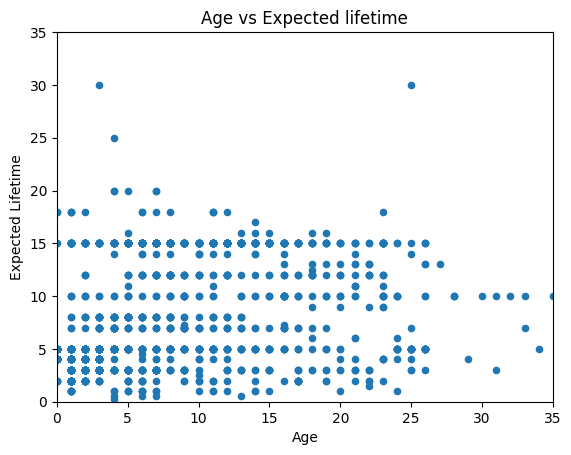

In [15]:
from datetime import datetime
sat_df['Age'] = (datetime.now() - sat_df['Date of Launch']).astype('<m8[Y]')
sat_df.plot(x='Age', y = 'Expected Lifetime (yrs.)', kind='scatter')
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.xlabel('Age')
plt.ylabel('Expected Lifetime')
plt.title('Age vs Expected lifetime')
plt.show()

In [16]:
sat_df = sat_df.drop(['Age', 'Expected Lifetime (yrs.)'], axis=1)

Finally we can look at the null `Type of Orbit `. `Type of Orbit` is actually a more specific version of `Class of Orbit` so we can use that to help us fill in values, and then drop the `Class of Orbit` column.



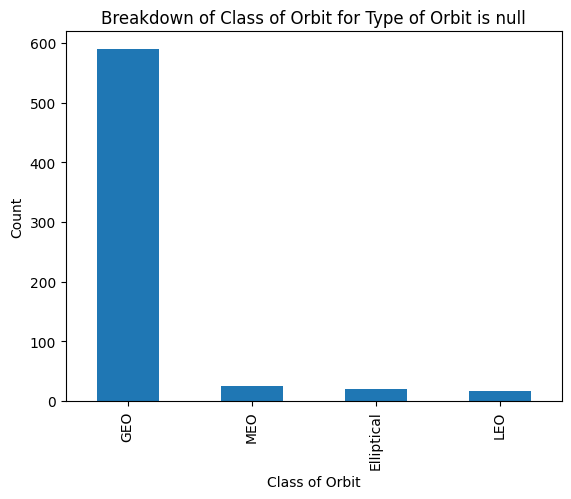

In [17]:
null_type_df = sat_df[sat_df['Type of Orbit'].isnull()]

# Plot the breakdown of 'Class of Orbit' for rows where 'Type of Orbit' is null
null_type_df['Class of Orbit'].value_counts().plot(kind='bar')
plt.xlabel('Class of Orbit')
plt.ylabel('Count')
plt.title('Breakdown of Class of Orbit for Type of Orbit is null')
plt.show()

The majority of Null values are from satellites in GEO orbits. GEO orbits are actually a type of Equatorial oribit within a specific altitude range, we can update these then to be `EQUATORIAL`.

In [18]:
# For entries, if Class of Orbit is GEO and have NaN Type of Orbit we can fill that in as either GEO (this is a type of EQUATORIAL at a specific altitude)
sat_df.loc[sat_df['Class of Orbit'] == 'GEO', 'Type of Orbit'] = sat_df.loc[sat_df['Class of Orbit'] == 'GEO', 'Type of Orbit'].fillna("Equatorial")
print(f"Remaining Null Values: {sat_df['Type of Orbit'].isnull().sum()}")

Remaining Null Values: 61


The remaining Null value count is pretty low compared to the overall number of rows we have to work with we can just drop the remaining rows with Null entries later. And since we're done with `Class of Orbit` that column can be removed as well.

In [19]:
sat_df = sat_df.drop(['Class of Orbit'], axis=1)

Finally - let's drop the remaining entries with Null values.

In [20]:
# Drop all remaining NaNs

non_nan_rows = sat_df.notnull().all(axis=1)
sat_df = sat_df[non_nan_rows]
print(f"Number of nulls per column:\n\n{sat_df.isnull().sum()}")
print(f"Remaining: {sat_df.shape[0]} entries and {sat_df.shape[1]} attributes")

Number of nulls per column:

Country/Org of UN Registry    0
Country of Operator/Owner     0
Users                         0
Purpose                       0
Type of Orbit                 0
Longitude of GEO (degrees)    0
Perigee (km)                  0
Apogee (km)                   0
Eccentricity                  0
Inclination (degrees)         0
Period (minutes)              0
Launch Mass (kg.)             0
Country of Contractor         0
Launch Site                   0
Launch Vehicle                0
Date of Launch                0
dtype: int64
Remaining: 7200 entries and 16 attributes


## Remove Duplicates
After going through a handful of the text-based columns, I found that there are a lot of entries for Countries/Users/Contractors/etc that are duplicates or similar values. While I'm not going to go through all of them (many of the columns won't actually end up being used later on). There are some that we will use that have duplicate/similar entries. One example is the `Country/Org of UN Registry`. There are many satellites with NR as their entry, but some have dates attacged. We want to consolidate those into just one NR category:

In [21]:
print("Before")
column_overview(sat_df, 'Country/Org of UN Registry', show_plot=False)
sat_df['Country/Org of UN Registry'] = sat_df['Country/Org of UN Registry'].str.replace(r'NR.*', 'NR',  regex=True)
print("\nAfter")
column_overview(sat_df, 'Country/Org of UN Registry', show_plot=False)

Before
Column: Country/Org of UN Registry
Type: object
Found 68 unique values
['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'China', 'China/Sri Lanka', 'Colombia', 'Czech Republic', 'Denmark', 'ESA', 'EUMETSAT', 'EUMETSAT/ESA', 'Egypt', 'Ethiopia', 'Finland', 'France', 'Germany', 'Greece', 'Inda', 'India', 'Indonesia', 'Iraq', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Laos', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'NR', 'NR ', 'NR (1/22)', 'NR (12/20)', 'NR (12/22)', 'NR (4/22)', 'NR (5/21)', 'NR (9/21)', 'NR (9/22)', 'NR (9/23)', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan', 'Peru', 'Russia', 'Saudi Arabia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Thailand', 'Turkey', 'USA', 'United Arab Emirates', 'United KIngdom', 'United Kingdom', 'Uruguay', 'Venezuela']

After
Column: Country/Org of UN Registry
Type: object
Found 59 unique values
['Algeria', 'Argentina', 'Australia'

## Cleaning Up String Values & Adding Encodings
A lot of the data we have is text-based which makes it prone to duplicate entries or misformatted text, especially if any data has been entered manually or if the data is compiled from multiple sources. The code below is designed to clean up our text to avoid some of the most common issues. The updates include the following:
- Remove leading/trailing whitespace
- Noramlize case to Upper
- Replace brackets with parentheses for consistency
- Update commonly misspelled words found while looking at raw data
- Sort values separated by `/` (example: in `Users` some have multiple categories like `Civil/Commercial`, if we have `Commercial/Civil` it is treated differently)

Additionally, for all of the text-based attributed, we are also going to create encodings so that they can be used by the model later on, as most models don't work well with string data.



In [22]:
sat_df['Purpose_subset'] = sat_df['Purpose'].str.split('/').str[0]

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_mappings = {}
categorical_feats = []
for col in sat_df.columns:
    # Check if the column is of object type (strings)
    if sat_df[col].dtype == 'object':
        # Strip whitespace from each value in the column
        sat_df[col] = sat_df[col].str.strip()
        sat_df[col] = sat_df[col].apply(lambda x: '/'.join(sorted(str(x).split('/'))))
        sat_df[col] = sat_df[col].str.upper() # to avoid any dupes due to case-inconsistency
        sat_df[col] = sat_df[col].str.replace('[', '(', regex=False).str.replace(']', ')', regex=False) # consistent use of brackets
        sat_df[col] = sat_df[col].str.replace('CENTRE', 'CENTER')
        # Add encoding
        sat_df[f'{col}_encoded'] = le.fit_transform(sat_df[col])
        sat_df[col] = pd.Categorical(sat_df[col])
        class_mapping = {index: label for index, label in enumerate(le.classes_)}
        encoded_mappings[col] = class_mapping
        categorical_feats.append(col)




# Model Building

With clean data to work with, we can start to build our models. First step is to perform feature selection so that we can decide which features we'll use to build the model. Once that's complete, we'll be building a few different Decision Tree Classifer models. In the following section we'll evaluate their performance.

## Feature selection
To get started with a first pass at feature selection we can use a correlation plot to see which values might be related to and influencing the attribute we want to predict (`Purpose`). Using the code below we can visualize the correlation plot.

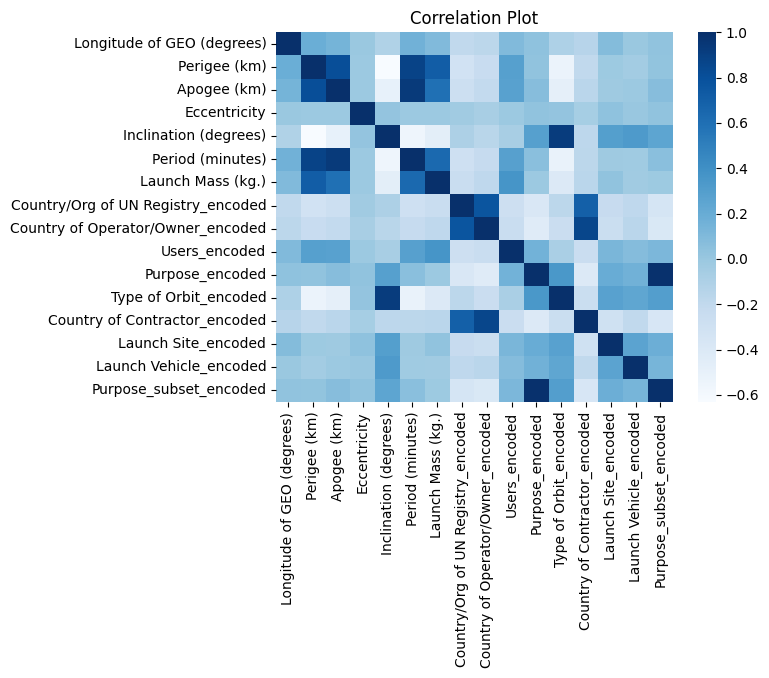

In [24]:
import seaborn as sns

corr = sat_df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='Blues')
plt.title('Correlation Plot')
plt.show()

From the above, we can take a look at the `Purpose_encoded` entry, and scan it to see which values may have the highest influence.

In [25]:
purpose_corr_values = corr['Purpose_encoded'].sort_values(ascending=False)
print(purpose_corr_values)

Purpose_encoded                       1.000000
Purpose_subset_encoded                0.990181
Type of Orbit_encoded                 0.350007
Inclination (degrees)                 0.289119
Launch Site_encoded                   0.198663
Launch Vehicle_encoded                0.160775
Users_encoded                         0.157345
Apogee (km)                           0.073531
Period (minutes)                      0.062707
Longitude of GEO (degrees)            0.038671
Eccentricity                          0.034768
Perigee (km)                          0.033314
Launch Mass (kg.)                    -0.008051
Country/Org of UN Registry_encoded   -0.379161
Country of Contractor_encoded        -0.405692
Country of Operator/Owner_encoded    -0.427213
Name: Purpose_encoded, dtype: float64


## Decision Tree Models

TODO: Add Decision Tree classifier overview + talk about when to use them.



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from typing import Optional, List

def get_confusion_matrix(y_test, y_pred, labels: Optional[List[str]] = None):
  plt.figure(figsize=(12, 12))
  if labels:
    cm = confusion_matrix(y_test, y_pred, labels = labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)
  else:
    cm = confusion_matrix(y_test, y_pred, labels = labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()


def build_and_eval_decision_tree(df: pd.DataFrame, features: List[str], target: str, target_encoding: Optional[dict] = None):
  X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=55)
  clf = DecisionTreeClassifier(random_state=55)
  clf.fit(X_train, y_train)

  # Evaluating model performance
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy}")

  if target_encoding:
    # Map the values back to original string values
    y_pred_decoded = [target_encoding[encoded_value] for encoded_value in y_pred]
    y_test_decided = [target_encoding[encoded_value] for encoded_value in y_test]
    labels = list(target_encoding.values())
    get_confusion_matrix(y_test_decided, y_pred_decoded, labels)
  else:
    get_confusion_matrix(y_test, y_pred)


## Model One: Basic

To build our basic model we'll start by using the top 5 highest correlated features.

Features: ['Type of Orbit_encoded', 'Inclination (degrees)', 'Launch Site_encoded', 'Launch Vehicle_encoded', 'Users_encoded']
Accuracy: 0.9006944444444445


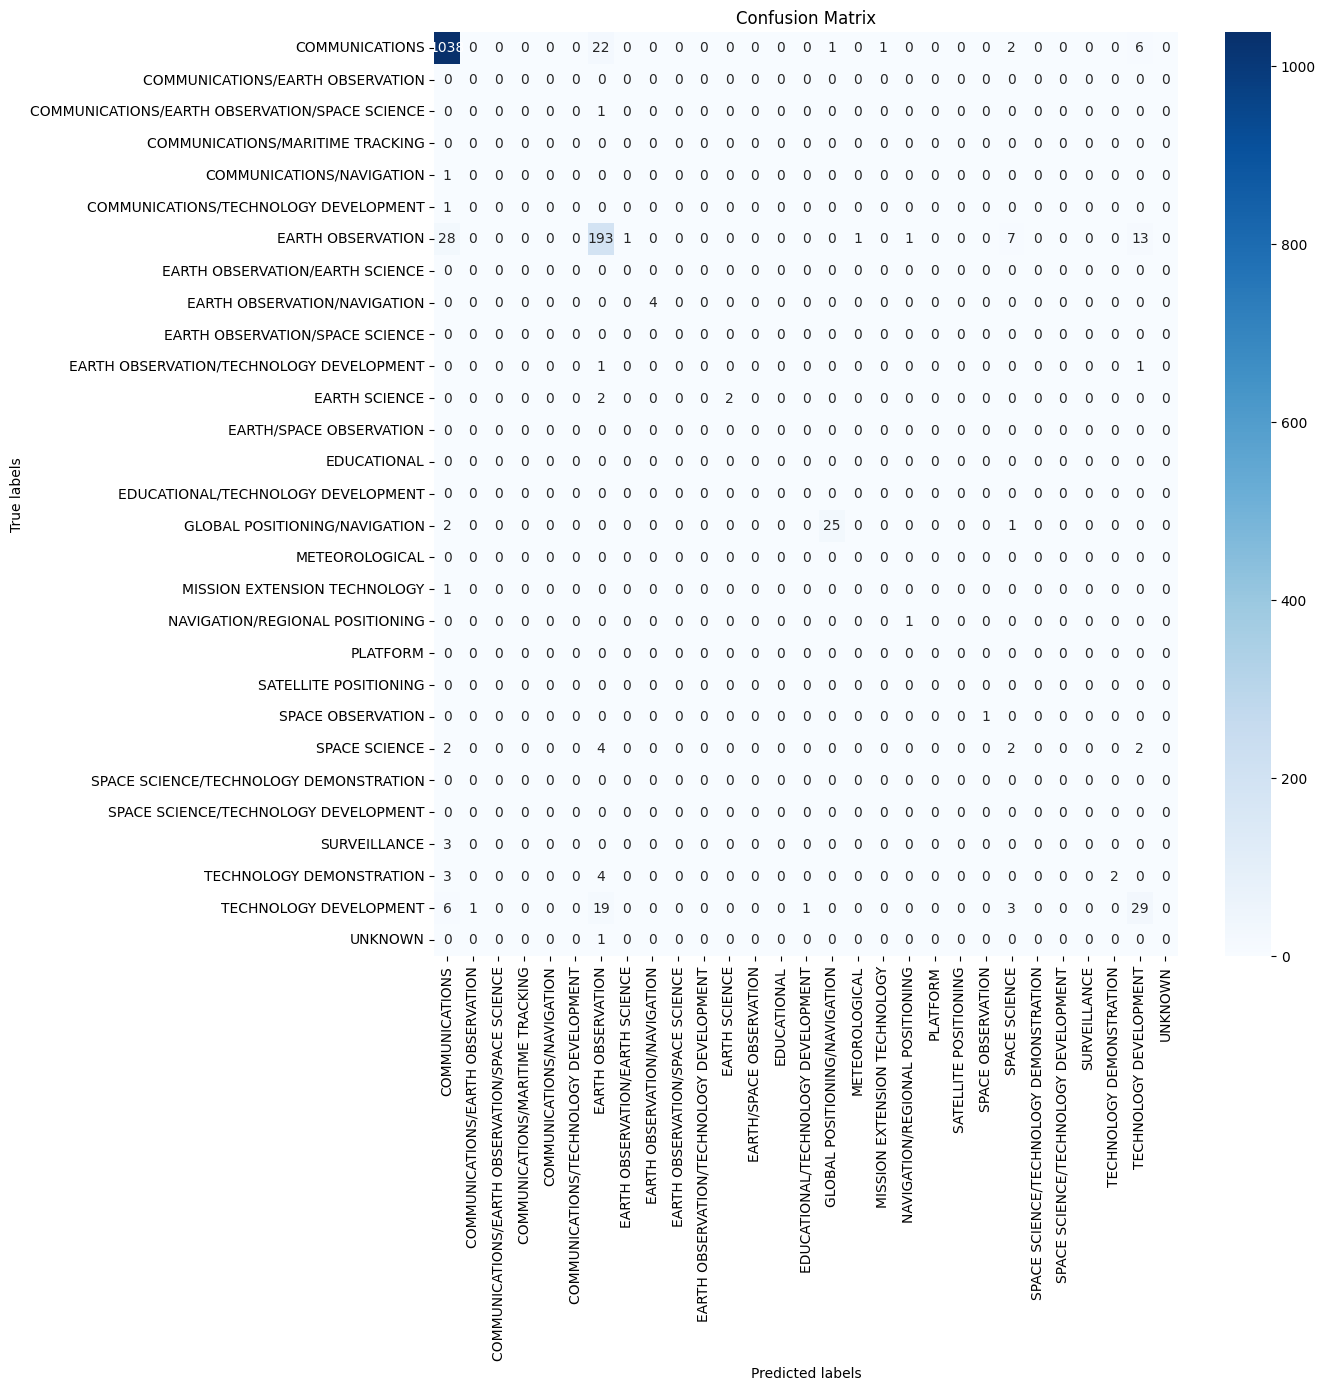

In [27]:
model_features = purpose_corr_values.head(7).index.tolist()[2:]
print(f"Features: {model_features}")

build_and_eval_decision_tree(
    df = sat_df,
    features = model_features,
    target = "Purpose_encoded",
    target_encoding=encoded_mappings['Purpose']
)


## Model Two - Consolidated Purpose

Looking at the evaluation from model one we see that we get about a 90% accuracy. But if we look at the confusion matrix, we see that a lot of the values are 0, which means a lot of these values aren't getting predicted. This makes sense if we look at the distribution of the Purpose values. Most of our satellites are classified as Communications, Earth Observation, or Technology Development. The rest of the categories have very few entries. So it makes sense that our initial model is biased toward correctly classifying the categories with the most values.



In [28]:
column_overview(sat_df, 'Purpose', show_plot=False)

Column: Purpose
Type: category
Found 29 unique values
['COMMUNICATIONS', 'COMMUNICATIONS/EARTH OBSERVATION', 'COMMUNICATIONS/EARTH OBSERVATION/SPACE SCIENCE', 'COMMUNICATIONS/MARITIME TRACKING', 'COMMUNICATIONS/NAVIGATION', 'COMMUNICATIONS/TECHNOLOGY DEVELOPMENT', 'EARTH OBSERVATION', 'EARTH OBSERVATION/EARTH SCIENCE', 'EARTH OBSERVATION/NAVIGATION', 'EARTH OBSERVATION/SPACE SCIENCE', 'EARTH OBSERVATION/TECHNOLOGY DEVELOPMENT', 'EARTH SCIENCE', 'EARTH/SPACE OBSERVATION', 'EDUCATIONAL', 'EDUCATIONAL/TECHNOLOGY DEVELOPMENT', 'GLOBAL POSITIONING/NAVIGATION', 'METEOROLOGICAL', 'MISSION EXTENSION TECHNOLOGY', 'NAVIGATION/REGIONAL POSITIONING', 'PLATFORM', 'SATELLITE POSITIONING', 'SPACE OBSERVATION', 'SPACE SCIENCE', 'SPACE SCIENCE/TECHNOLOGY DEMONSTRATION', 'SPACE SCIENCE/TECHNOLOGY DEVELOPMENT', 'SURVEILLANCE', 'TECHNOLOGY DEMONSTRATION', 'TECHNOLOGY DEVELOPMENT', 'UNKNOWN']


Column: Purpose
Type: category
Found 29 unique values


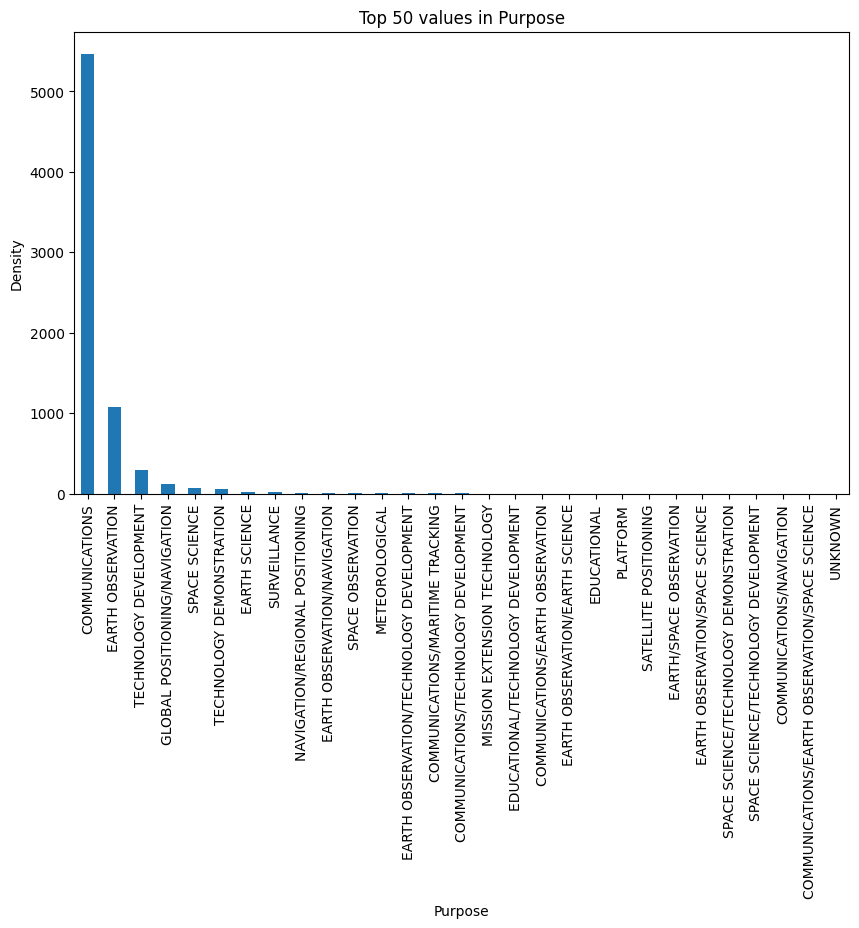

In [29]:
column_overview(sat_df, 'Purpose', show_plot=True)

For the next model, I'm going to use a subset of the values. During preprocessing for the satelites that had multiple purposes, we added another attribute caled `Purpose_subset` and took the first purpose listed - this is making an assumption that the first value listed is the primary use. From the plot below we can see that the data are still overwhelmingly classified as being for communications, but the goal is to see if having fewer values to classify with helps the overall accuracy.

Column: Purpose_subset
Type: category
Found 16 unique values


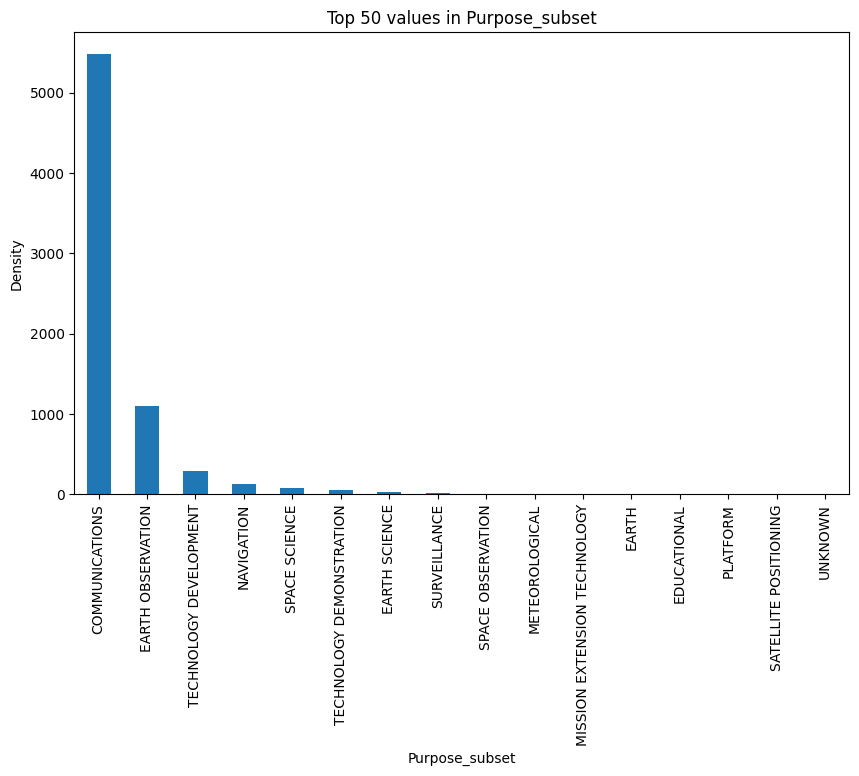

In [30]:
column_overview(sat_df, 'Purpose_subset', show_plot=True)

Accuracy: 0.9020833333333333


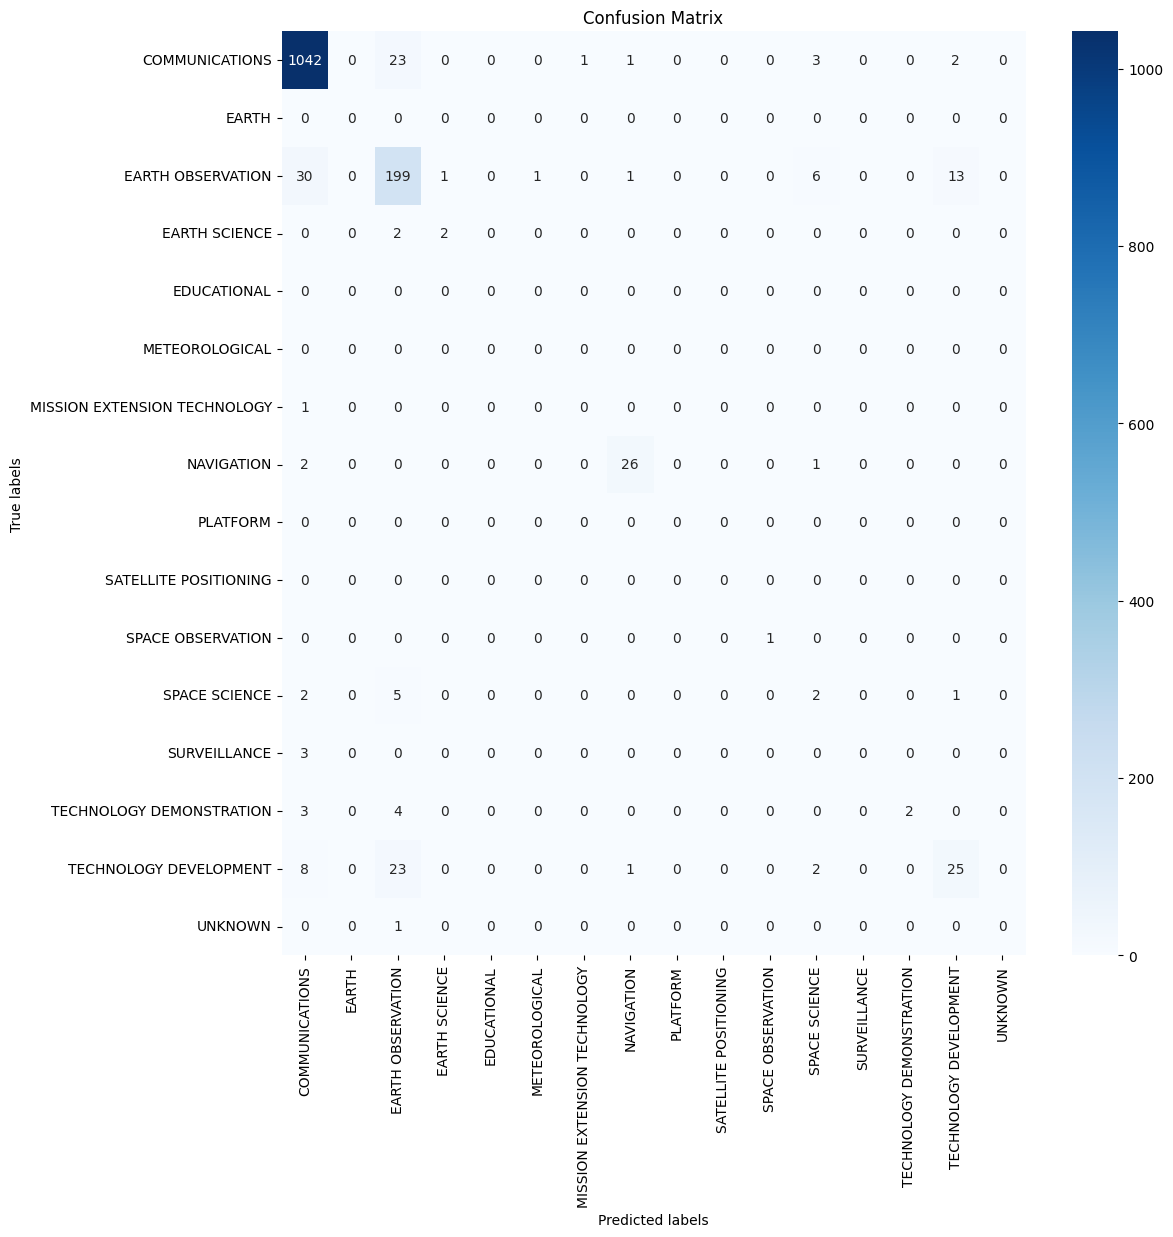

In [31]:
build_and_eval_decision_tree(
    df = sat_df,
    features = model_features,
    target = "Purpose_subset_encoded",
    target_encoding=encoded_mappings['Purpose_subset']
)

While the accuracy of the above does seem better, there is still a bias in our data. We are exceptionally good at classifying Communications sats because there are so many of them. If we were to build a model without those satellites, it's highly likely our accuracy would decrease, let's take a look.

## Model Three - Reduce # of communication sats

Now that we have two models - lets see what happens if we remove the communcations bias...

Column: Purpose
Type: category
Found 29 unique values


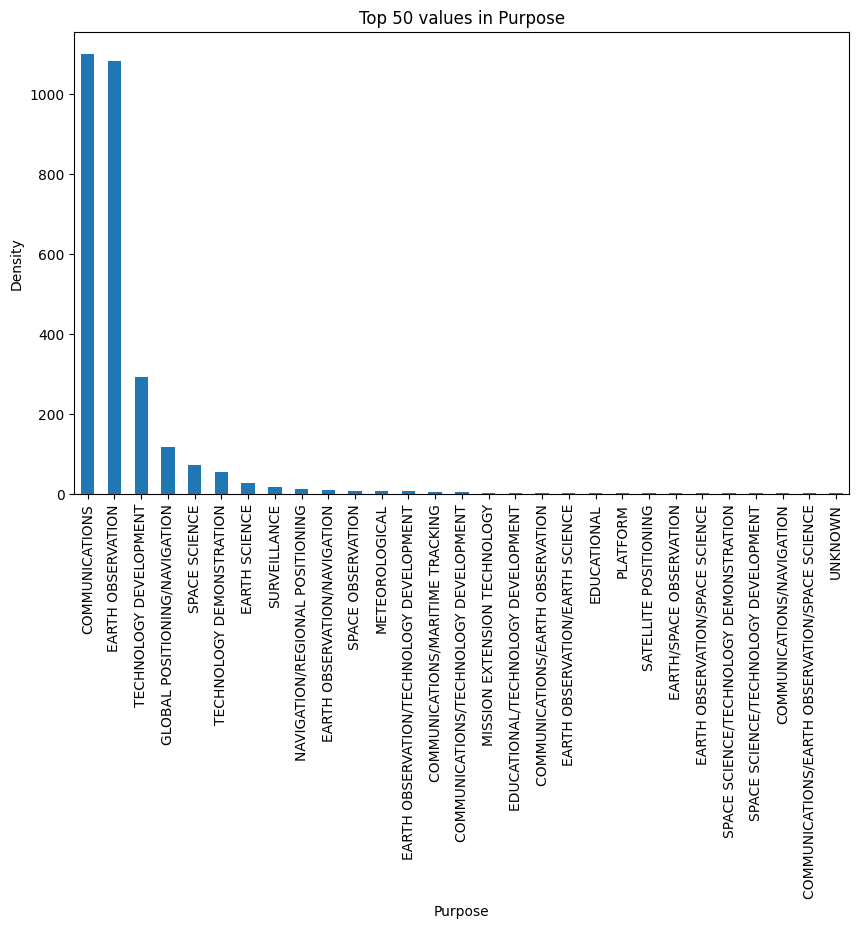

In [32]:
downsampled_sat_df = pd.concat([
    sat_df[sat_df['Purpose'] != 'COMMUNICATIONS'],  # Keep all rows except COMMUNICATIONS
    sat_df[sat_df['Purpose'] == 'COMMUNICATIONS'].sample(n=1100, random_state=55)  # some from COMMUNICATIONS
])

column_overview(downsampled_sat_df, 'Purpose', show_plot=True)

Accuracy: 0.7901234567901234


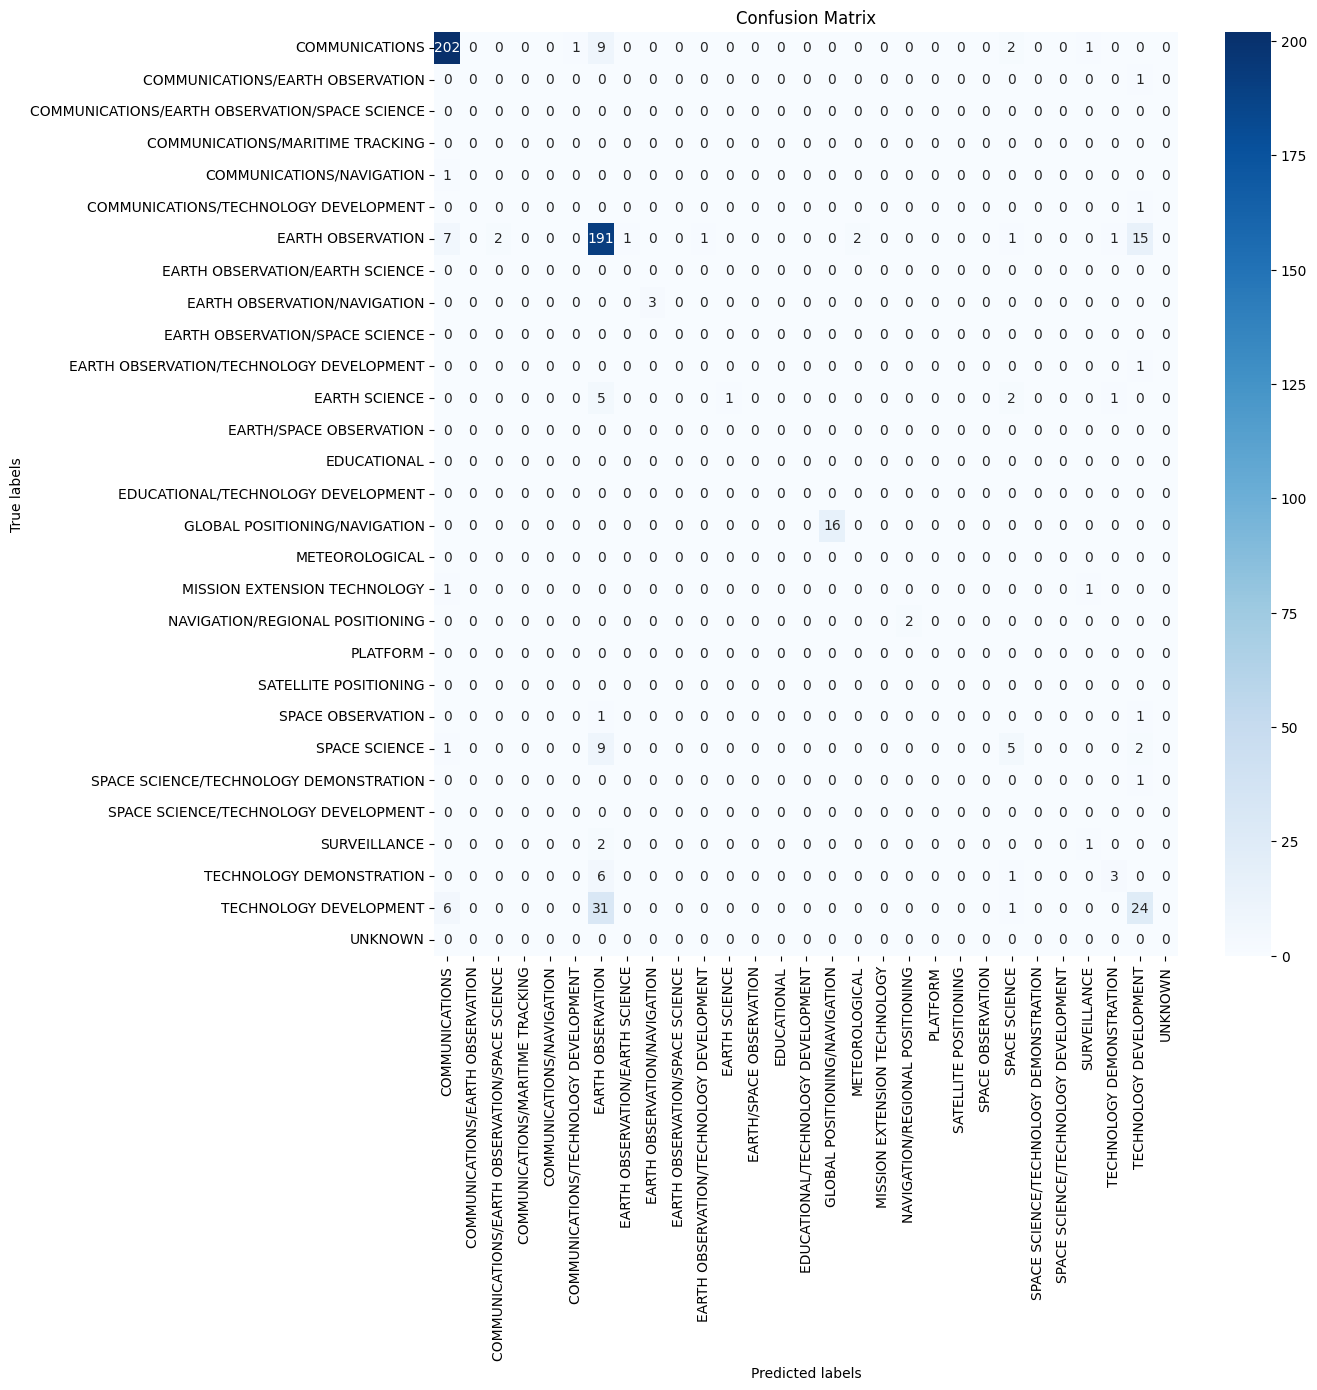

In [33]:
build_and_eval_decision_tree(
    df = downsampled_sat_df,
    features = model_features,
    target = "Purpose_encoded",
    target_encoding=encoded_mappings['Purpose']
)

Column: Purpose
Type: category
Found 29 unique values


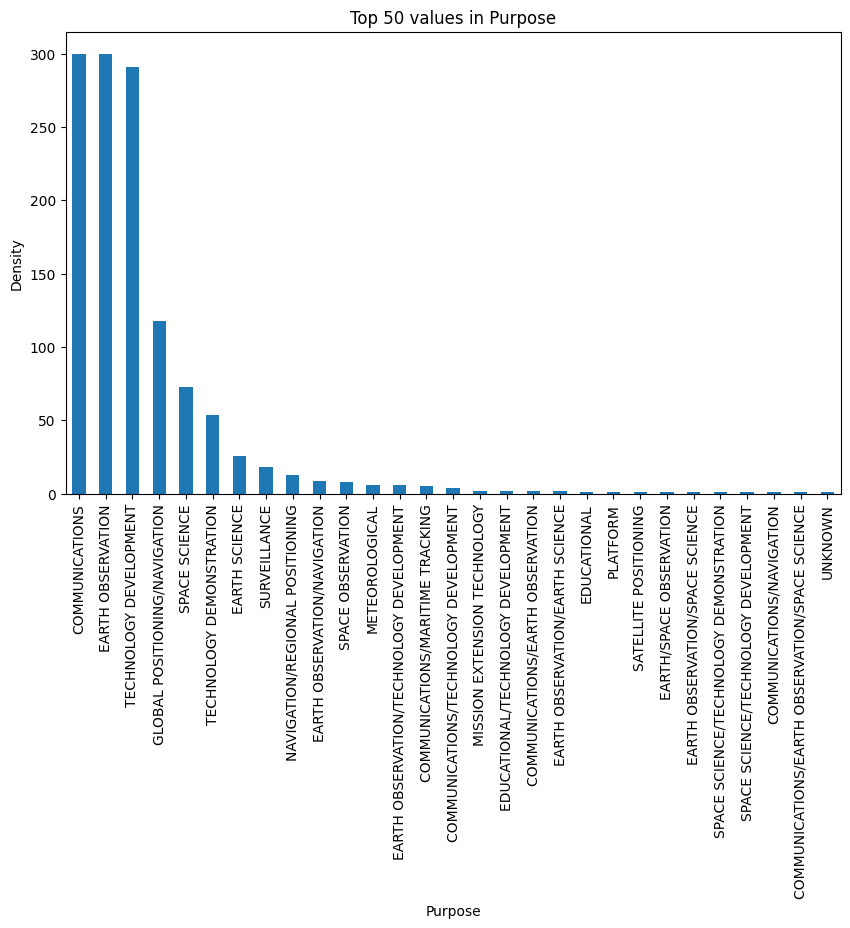

In [34]:
downsampled_sat_df = pd.concat([
    sat_df[(sat_df['Purpose'] != 'COMMUNICATIONS') & (sat_df['Purpose'] != 'EARTH OBSERVATION')],  # Keep all rows except COMMUNICATIONS and EARTH OBSERVATION
    sat_df[sat_df['Purpose'] == 'COMMUNICATIONS'].sample(n=300, random_state=55),  # Sample from COMMUNICATIONS
    sat_df[sat_df['Purpose'] == 'EARTH OBSERVATION'].sample(n=300, random_state=55)  # Sample from EARTH OBSERVATION
])

column_overview(downsampled_sat_df, 'Purpose', show_plot=True)


Accuracy: 0.7


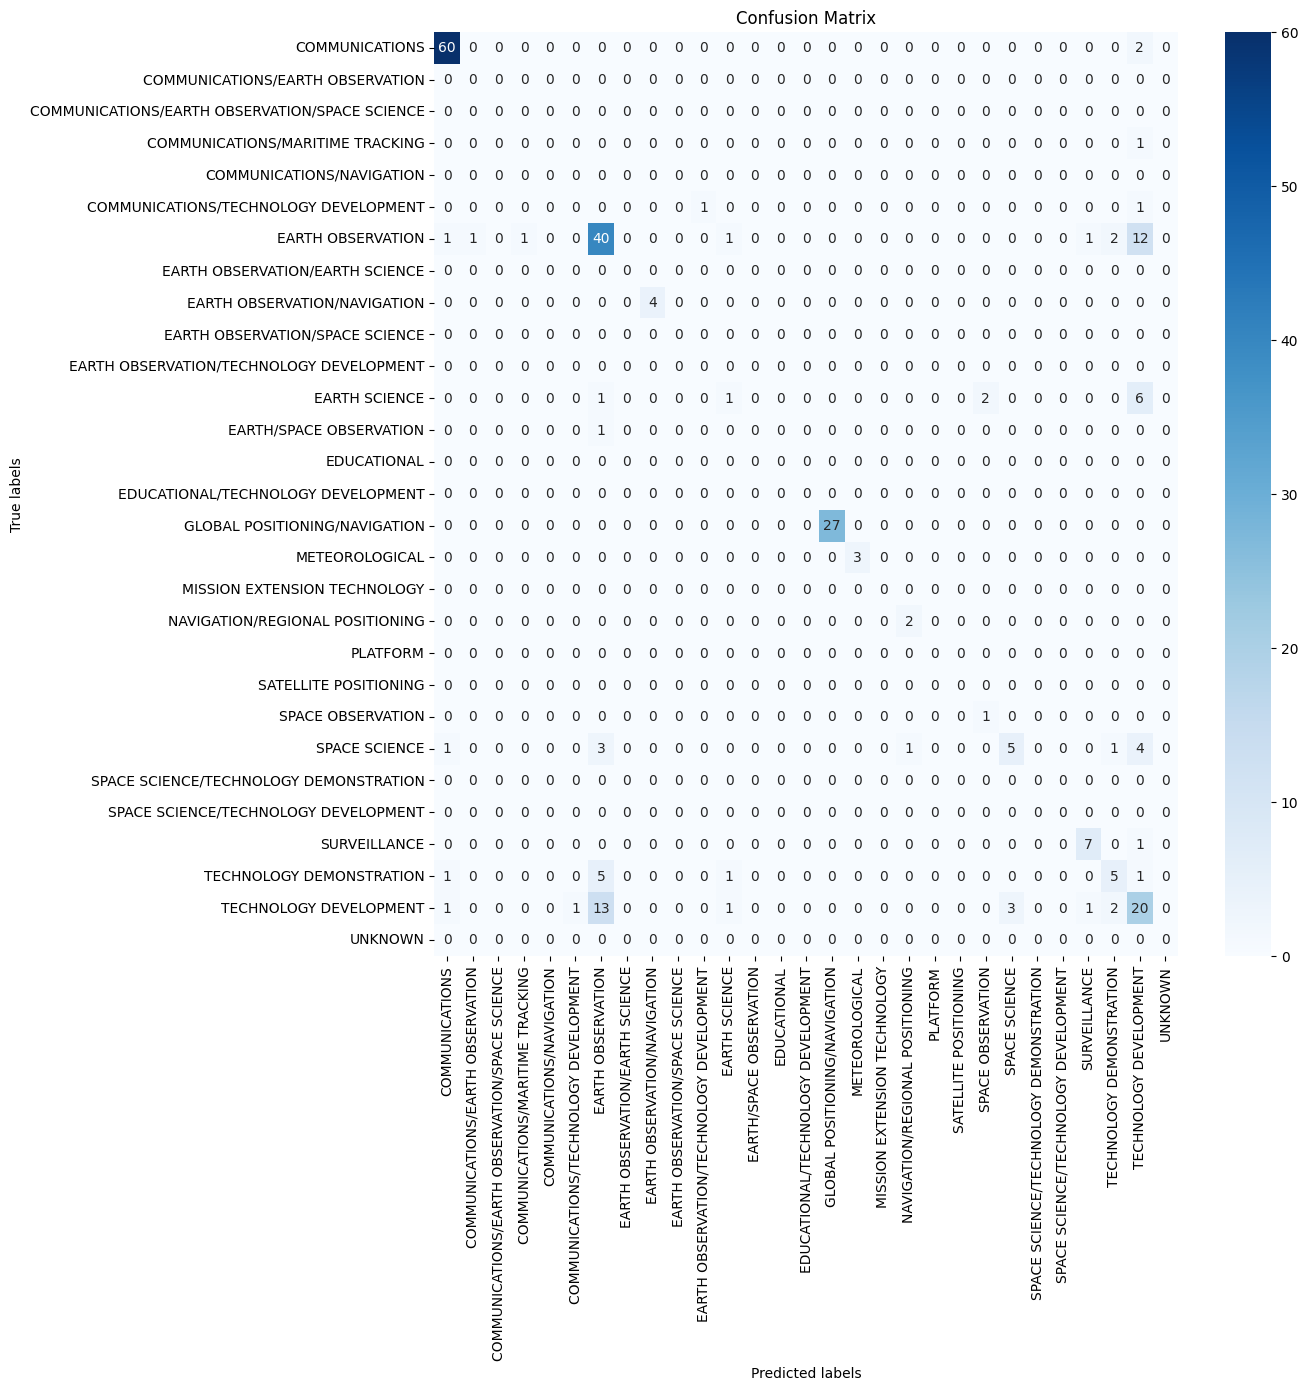

In [35]:
build_and_eval_decision_tree(
    df = downsampled_sat_df,
    features = model_features,
    target = "Purpose_encoded",
    target_encoding=encoded_mappings['Purpose']
)

Accuracy: 0.496


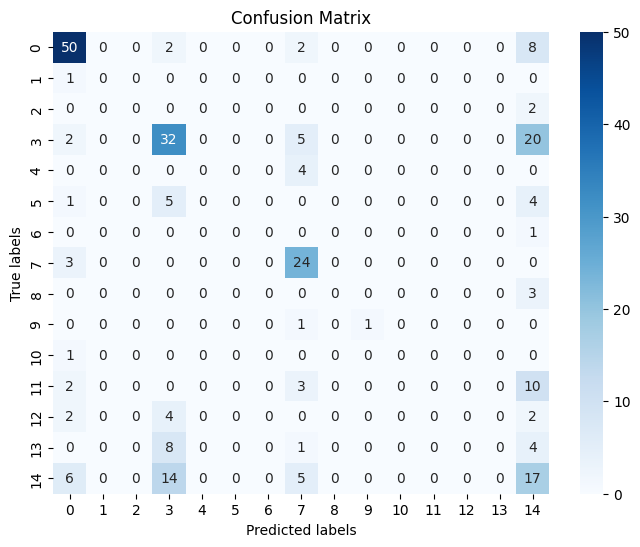

In [36]:
from sklearn.neighbors import KNeighborsClassifier
import math
X = downsampled_sat_df[model_features]
y = downsampled_sat_df['Purpose_encoded']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
k = int(math.sqrt(len(X_train)))

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()